In [1]:
!pip install pandas numpy scikit-learn matplotlib


In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/COEN498-691-PROJECT/ML_project/main/data/processed/COEN498-691_HAR_preprocessed_dataset.csv"
data = pd.read_csv(url)

print("✅ Data loaded successfully!")
print(data.shape)
data.head()


✅ Data loaded successfully!
(4751, 39)


,ax_mean,ax_std,ax_max,ax_min,ax_range,ax_skew,ax_kurt,ax_zcr,ay_mean,ay_std,...,ayG_mean,azG_mean,Gx,Gy,Gz,Gx_angle,Gy_angle,Gz_angle,activity_id,participant_id
0,-0.002040,0.007937,0.013687,-0.024382,0.038069,-0.428371,1.735067,0,0.000018,0.003702,...,-1.023843,0.187873,0.065561,-0.981462,0.180096,1.505189,2.948741,1.389712,1,LL
1,0.004890,0.009201,0.032755,-0.011421,0.044177,1.177575,2.846603,0,0.001896,0.004891,...,-1.023652,0.190706,0.069292,-0.980722,0.182708,1.501449,2.944921,1.387056,1,LL
2,-0.010652,0.043875,0.070725,-0.110145,0.180870,-0.535210,0.442954,6,-0.003511,0.019515,...,-1.023306,0.193795,0.073180,-0.979901,0.185575,1.497551,2.940762,1.384139,1,LL
3,-0.006527,0.066108,0.150761,-0.110145,0.260906,0.463284,-0.030079,9,0.000702,0.028293,...,-1.022801,0.197092,0.077102,-0.979012,0.188654,1.493618,2.936354,1.381005,1,LL
4,0.009423,0.055730,0.150761,-0.108607,0.259368,0.306438,0.663858,8,0.002152,0.026648,...,-1.022139,0.200553,0.080937,-0.978070,0.191906,1.489771,2.931781,1.377692,1,LL


In [7]:
# ===== 2. Explore the Dataset =====
# In this part, we look at the dataset to understand what kind of data we have,
# check for missing values, and see how the activities are distributed.
# This also helps us find the correct name of the target column.

print("Dataset Info:")
data.info()

print("\nMissing values in the dataset:", data.isnull().sum().sum())

print("\nActivity distribution in the dataset:")
display(data['activity_id'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ax_mean         4751 non-null   float64
 1   ax_std          4751 non-null   float64
 2   ax_max          4751 non-null   float64
 3   ax_min          4751 non-null   float64
 4   ax_range        4751 non-null   float64
 5   ax_skew         4751 non-null   float64
 6   ax_kurt         4751 non-null   float64
 7   ax_zcr          4751 non-null   int64  
 8   ay_mean         4751 non-null   float64
 9   ay_std          4751 non-null   float64
 10  ay_max          4751 non-null   float64
 11  ay_min          4751 non-null   float64
 12  ay_range        4751 non-null   float64
 13  ay_skew         4751 non-null   float64
 14  ay_kurt         4751 non-null   float64
 15  ay_zcr          4751 non-null   int64  
 16  az_mean         4751 non-null   float64
 17  az_std          475

,count
activity_id,
1,1205
4,1196
3,1184
2,1166


In [8]:
# ===== 3. Prepare the Data =====
# In this part, we separate the features (X) and the target (y),
# split the dataset into training and testing sets,
# and then prepare everything for the model.

from sklearn.model_selection import train_test_split

# The target column (label)
target_col = "activity_id"

# All numeric features except the target column
X = data.select_dtypes(include=["number"]).drop(columns=[target_col])
y = data[target_col]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Number of classes:", y.nunique())
print("Class labels:", y.unique())


Training set shape: (3800, 37)
Testing set shape: (951, 37)
Number of classes: 4
Class labels: [1 2 3 4]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

CV Accuracy: 0.999 ± 0.001
CV F1-macro: 0.999 ± 0.001

Test Accuracy: 0.9989484752891693
Test F1-macro: 0.9989449175744679

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       233
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       240

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



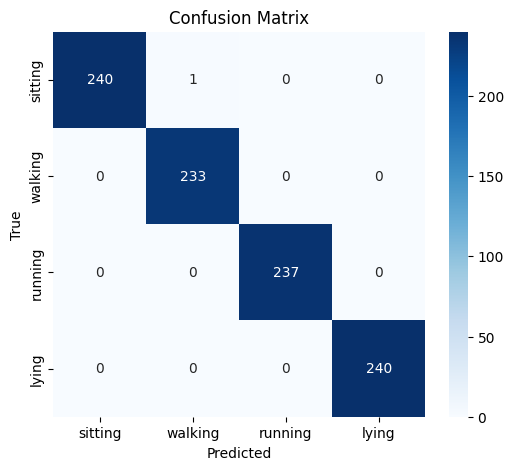

In [9]:
# ===== 4. Train and Evaluate the Logistic Regression Model =====
# In this part, we train a Logistic Regression model and check its performance
# using accuracy, F1-score, and a confusion matrix.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline: scaling + model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, multi_class="multinomial", solver="lbfgs"))
])

# 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
cv_f1 = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1_macro")

print(f"CV Accuracy: {cv_acc.mean():.3f} ± {cv_acc.std():.3f}")
print(f"CV F1-macro: {cv_f1.mean():.3f} ± {cv_f1.std():.3f}")

# Train on full training set
pipe.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipe.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1-macro:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['sitting','walking','running','lying'],
            yticklabels=['sitting','walking','running','lying'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
